# 🌟 **GROUP FINAL PROJECT - GROUP 2** 🌟


# ✨ ***Data Processing File*** ✨

`File này sẽ chỉ tập trung vào xử lí dữ liệu cũng như vẽ biểu đồ thể hiện sự thay đổi trước và sau khi xử lí, vẽ biểu đồ phục vụ cho báo cáo`

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("AmesHousing.csv")
nhom_1 = df.copy()
nhom_2 = df.copy()
nhom_3 = df.copy()
B = df.copy()
df_raw = df.copy()
df_clean = df.copy()
df_insight = df.copy()  

# **A, Feature Removal**

In [404]:
cols_to_drop = ['Order', 'PID', #ID columns
                'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vrn Type', #High missing values
                '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Misc Val', 'Bsmt Half Bath', 'Overall Cond', 'Low Qual Fin SF', 'Yr Sold', 'MS SubClass', #Low correlation
                'Garage Area', 'TotRms AbvGrd' # Multicollinear with 'Gr Liv Area'
                ] 
# Tổng cộng xoá 20 biến
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

**Các nhóm biến và lí do bị loại bỏ:**

* **Nhóm 1:** `Order`, `PID` Loại dựa theo bản chất

* **Nhóm 2:** `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Mas Vrn Type` Loại dựa theo missing value quá cao

* **Nhóm 3:** `3Ssn Porch`, `Mo Sold`, `Pool Area`, `BsmtFin SF 2`, `Misc Val`, `Bsmt Half Bath`, `Overall Cond`, `Low Qual Fin SF`, `Yr Sold`, `MS SubClass` Loại dựa theo tương quan thấp đối với biến mục tiêu

* **Nhóm 4:** `Garage Area`, `TotRms AbvGrd` Loại dựa theo tương quan cao, dễ gây đa cộng tuyến


## ***Nhóm 1***

**`Order` và `PID` là 2 biến định danh, điều này được thể hiện qua việc số lượng giá trị duy nhất của cả 'Order' và 'PID' đều bằng tổng số hàng ($2930$)**

In [7]:
cols_to_drop = ['Order', 'PID']
nhom_1 = nhom_1.drop(columns=[c for c in cols_to_drop if c in df.columns])
nhom_1.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1995.0,RFn,2.0,608.0,TA,TA,Y,237,152,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


## ***Nhóm 2***

**Nhóm các biến gồm `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`,`Mas Vrn Type` bị buộc phải loại bỏ vì tỉ lệ missing value quá cao**


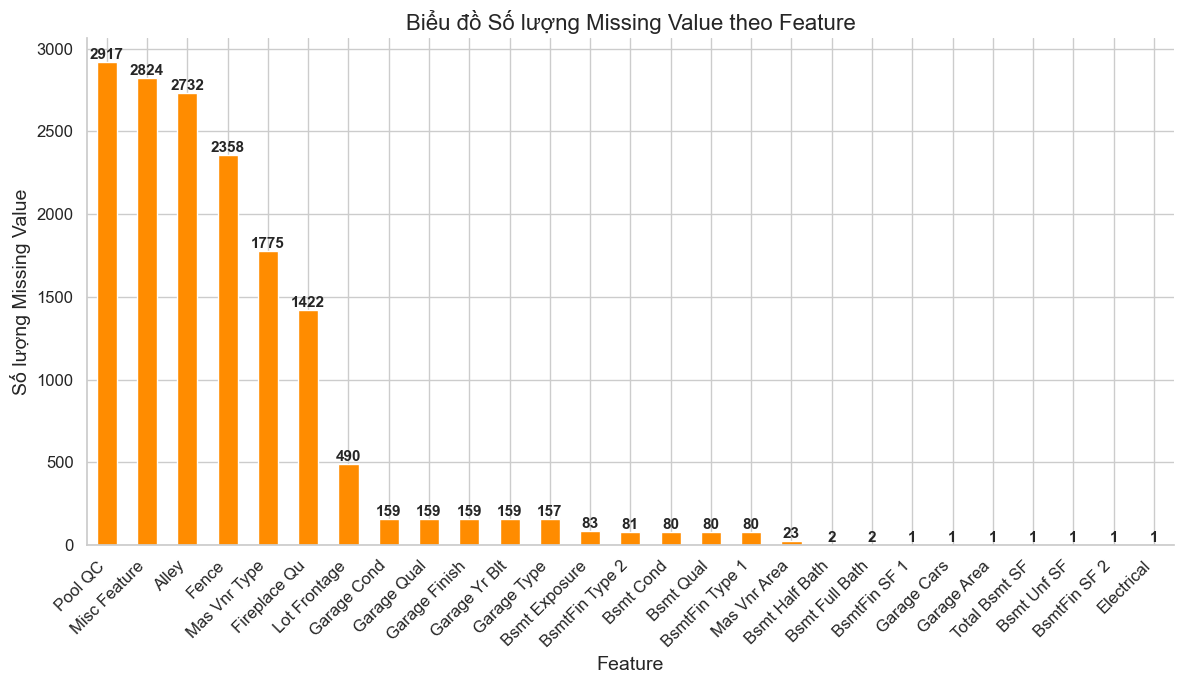

In [406]:
missing_counts = nhom_2.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

if missing_counts.empty:
    print("Không có giá trị thiếu (missing values) nào trong dữ liệu để vẽ biểu đồ.")
else:
    plt.figure(figsize=(12, 7))
    ax = plt.gca() # Lấy đối tượng Axes hiện tại
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    missing_counts.plot(kind='bar', color='darkorange')

    plt.title('Biểu đồ Số lượng Missing Value theo Feature', fontsize=16)
    plt.xlabel('Feature', fontsize=14)
    plt.ylabel('Số lượng Missing Value', fontsize=14)
    
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    for i, count in enumerate(missing_counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.tight_layout()


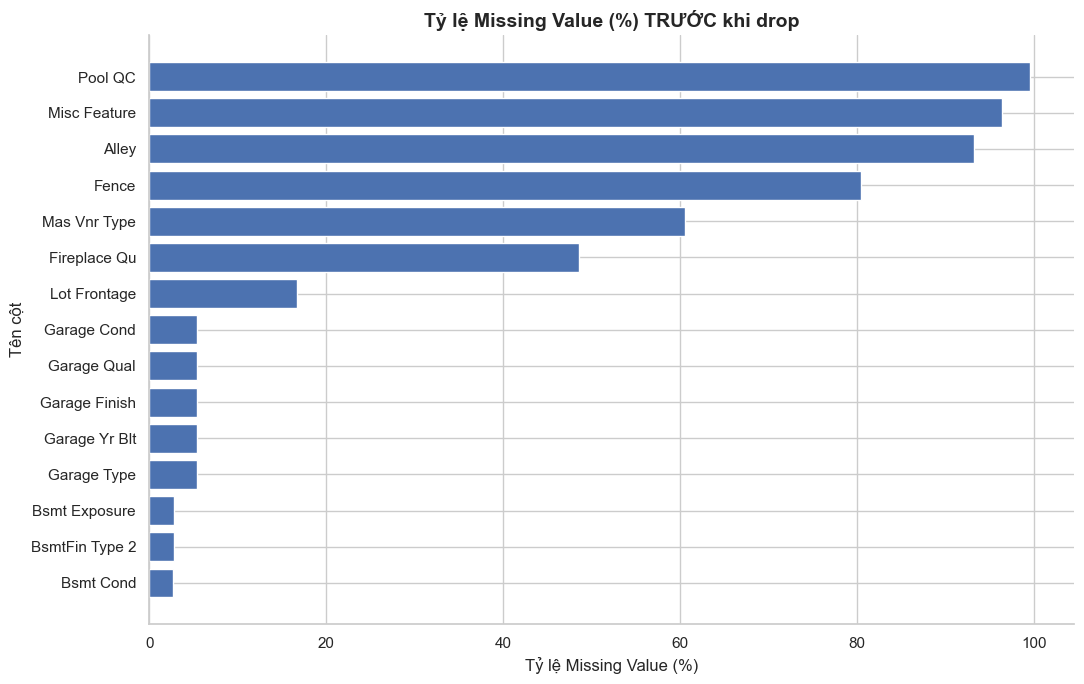

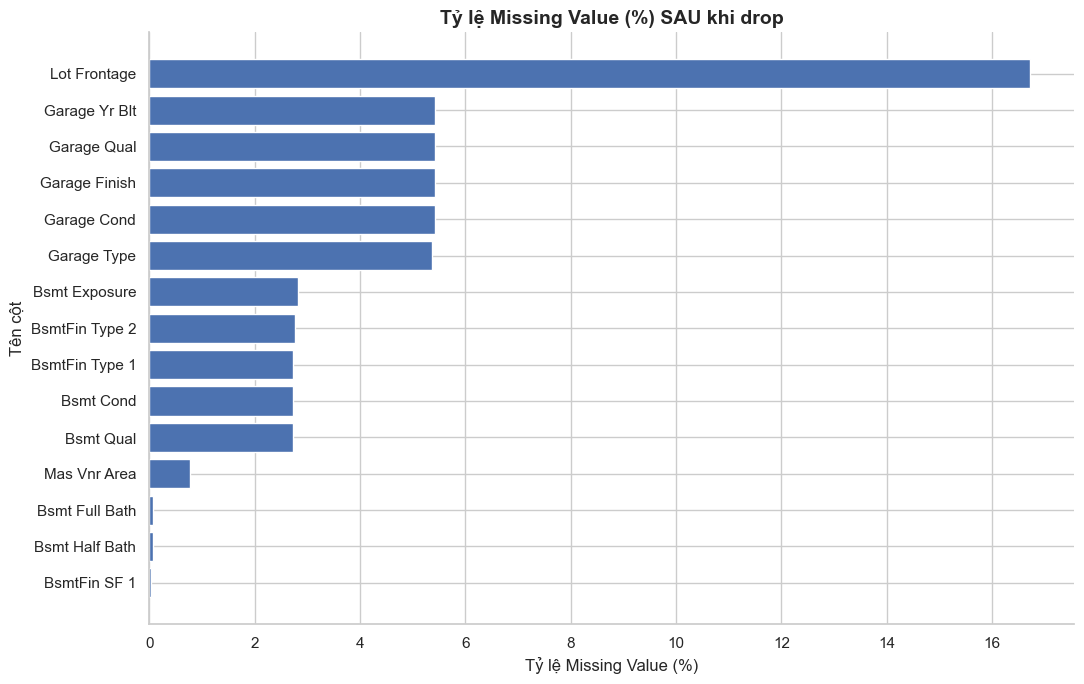

In [407]:
def plot_missing_ratio(df, title, topn=15):
    miss_ratio = (df.isna().mean() * 100).round(2)
    miss_ratio = miss_ratio[miss_ratio > 0].sort_values(ascending=False).head(topn)

    plt.figure(figsize=(11,7))
    ax = plt.gca() # Lấy đối tượng Axes hiện tại
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.barh(miss_ratio.index[::-1], miss_ratio.values[::-1])  # đảo để cột lớn ở trên
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Tỷ lệ Missing Value (%)')
    plt.ylabel('Tên cột')
    plt.tight_layout()
    plt.show()

cols_to_drop = ['Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vnr Type']
nhom_2_cleaned = nhom_2.drop(columns=[c for c in cols_to_drop if c in nhom_2.columns])
# 4) Vẽ 2 biểu đồ tách rời
plot_missing_ratio(nhom_2,  'Tỷ lệ Missing Value (%) TRƯỚC khi drop', topn=15)
plot_missing_ratio(nhom_2_cleaned,'Tỷ lệ Missing Value (%) SAU khi drop',   topn=15)


## ***Nhóm 3***

**Nhóm các biến `3Ssn Porch`, `Mo Sold`, `Pool Area`, `BsmtFin SF 2`, `Misc Val`, `Bsmt Half Bath`, `Overall Cond`, `Low Qual Fin SF`, `Yr Sold`, `MS SubClass` bị loại bỏ dựa theo tương quan thấp đối với biến mục tiêu (< 0.05)**

In [408]:
indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
nhom_3 = nhom_3.drop(index=indices_to_drop, axis=0)

nhom_3 = nhom_3[nhom_3['Gr Liv Area'] < 4000]
y_raw = nhom_3['SalePrice']

y_log = np.log1p(nhom_3['SalePrice']) 

cols_to_drop = ['Order', 'PID', 'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu'] 
nhom_3 = nhom_3.drop(columns=[c for c in cols_to_drop if c in nhom_3.columns])

nhom_3['TotalSF'] = nhom_3['Total Bsmt SF'] + nhom_3['1st Flr SF'] + nhom_3['2nd Flr SF']

X_train, X_test, y_train_log, y_test_log = train_test_split(nhom_3, y_log, test_size=0.3, random_state=42)

train_analysis = X_train.copy()
train_analysis['SalePrice'] = y_train_log
corr_matrix = train_analysis.corr(method="pearson", numeric_only=True)

target_var = 'SalePrice'
corr_with_target = corr_matrix[target_var].sort_values(ascending=False)
corr_with_target = corr_with_target.drop(target_var)

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/297339495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')


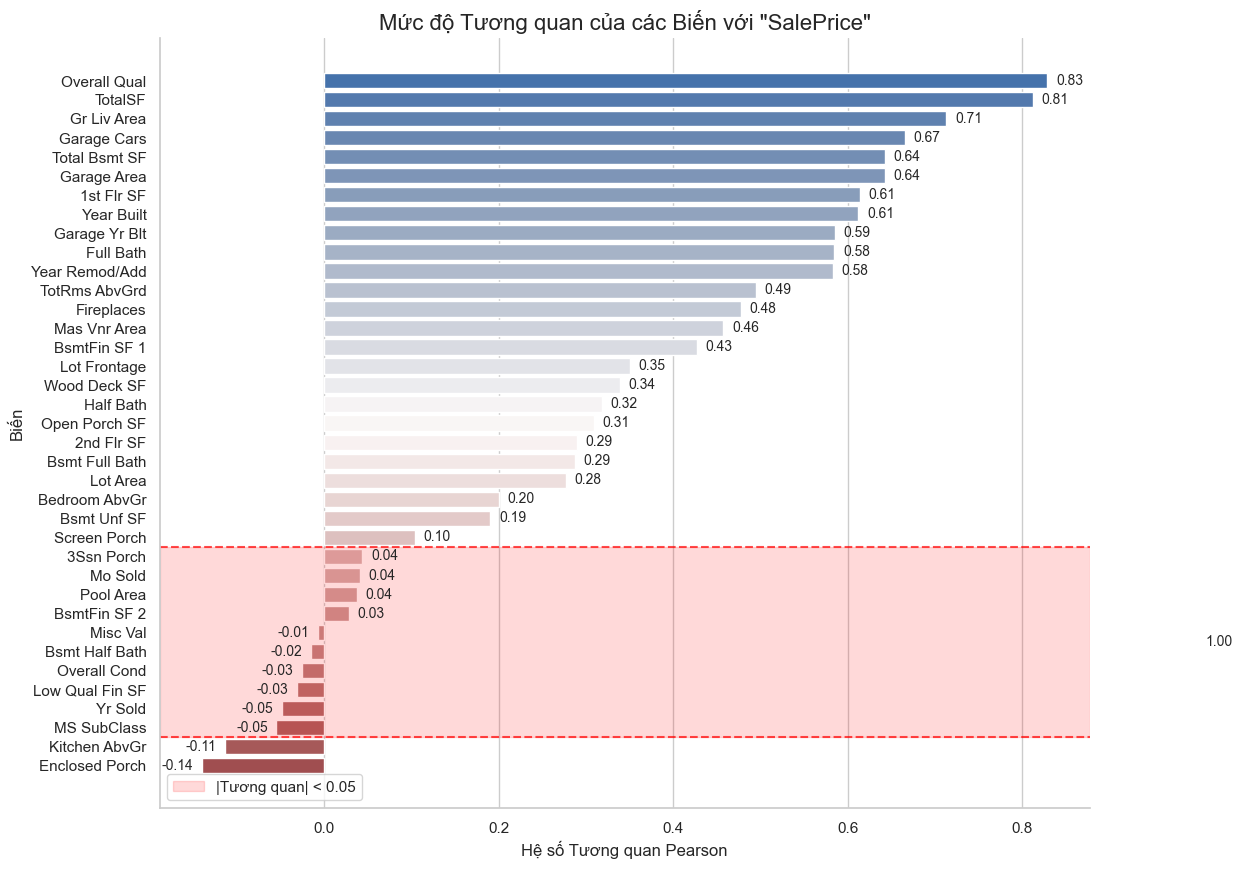

In [409]:
plt.figure(figsize=(12, 10))
ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')
target_var = 'SalePrice'
plt.title(f'Mức độ Tương quan của các Biến với "{target_var}"', fontsize=16)
plt.xlabel('Hệ số Tương quan Pearson')
plt.ylabel('Biến')

# 3. PHẦN CẬP NHẬT: THÊM VÙNG ĐỎ

# a. Xác định các biến có |Tương quan| < 0.05
# Lấy index (tên biến) của những biến thỏa mãn điều kiện
weak_corr_vars = corr_with_target[np.abs(corr_with_target.values) < 0.06].index

if not weak_corr_vars.empty:
    # b. Xác định vị trí Y (trục dọc) trên biểu đồ
    # Lấy tất cả các tên biến theo thứ tự hiển thị trên biểu đồ
    all_vars_in_plot_order = corr_with_target.index.tolist()
    
    # Tìm chỉ số (vị trí) của biến đầu tiên và cuối cùng trong danh sách weak_corr_vars
    # Vị trí của biến đầu tiên có tương quan yếu (y_min)
    first_weak_var_index = all_vars_in_plot_order.index(weak_corr_vars[0])
    
    # Vị trí của biến cuối cùng có tương quan yếu (y_max)
    last_weak_var_index = all_vars_in_plot_order.index(weak_corr_vars[-1])
    
    # c. Vẽ vùng ngang (axhspan)
    # y_min là vị trí của thanh cuối cùng trong vùng yếu (chỉ số lớn nhất) + 0.5 (để bao trọn thanh)
    # y_max là vị trí của thanh đầu tiên trong vùng yếu (chỉ số nhỏ nhất) - 0.5 (để bao trọn thanh)
    # Chú ý: Trục y của barplot được đánh số từ 0 (thanh trên cùng) đến N-1 (thanh dưới cùng).
    # Tuy nhiên, vị trí của chúng được xác định bằng các chỉ số trong danh sách corr_with_target.index.
    
    # Để bao trùm từ mép trên của thanh đầu tiên đến mép dưới của thanh cuối cùng:
    y_start = last_weak_var_index + 0.5  # Vị trí thấp nhất (dưới cùng của thanh cuối)
    y_end = first_weak_var_index - 0.5 # Vị trí cao nhất (trên cùng của thanh đầu)
    
    # Vẽ vùng phủ (axhspan)
    ax.axhspan(ymin=y_end, ymax=y_start, color='red', alpha=0.15, label='|Tương quan| < 0.05')
    
    # Thêm đường viền hoặc text để làm nổi bật hơn
    ax.axhline(y=y_end, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.axhline(y=y_start, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

# 4. THÊM TEXT VÀ HIỂN THỊ GIÁ TRỊ (Đã có trong code của bạn)
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    if width > 0:
        x = width + 0.01
        ha = 'left'
    else:
        x = width - 0.01
        ha = 'right'
    ax.text(
        x=x,                 
        y=y,                 
        s=f'{width:.2f}',    
        ha=ha,               
        va='center',         
        fontsize=10
    )

# Thêm chú giải
ax.legend(loc='lower left') 
plt.show()

## ***Nhóm 4***

**2 biến`Garage Area`, `TotRms AbvGrd` bị loại dựa theo tương quan cao của chúng với một biến khác, dễ gây đa cộng tuyến**

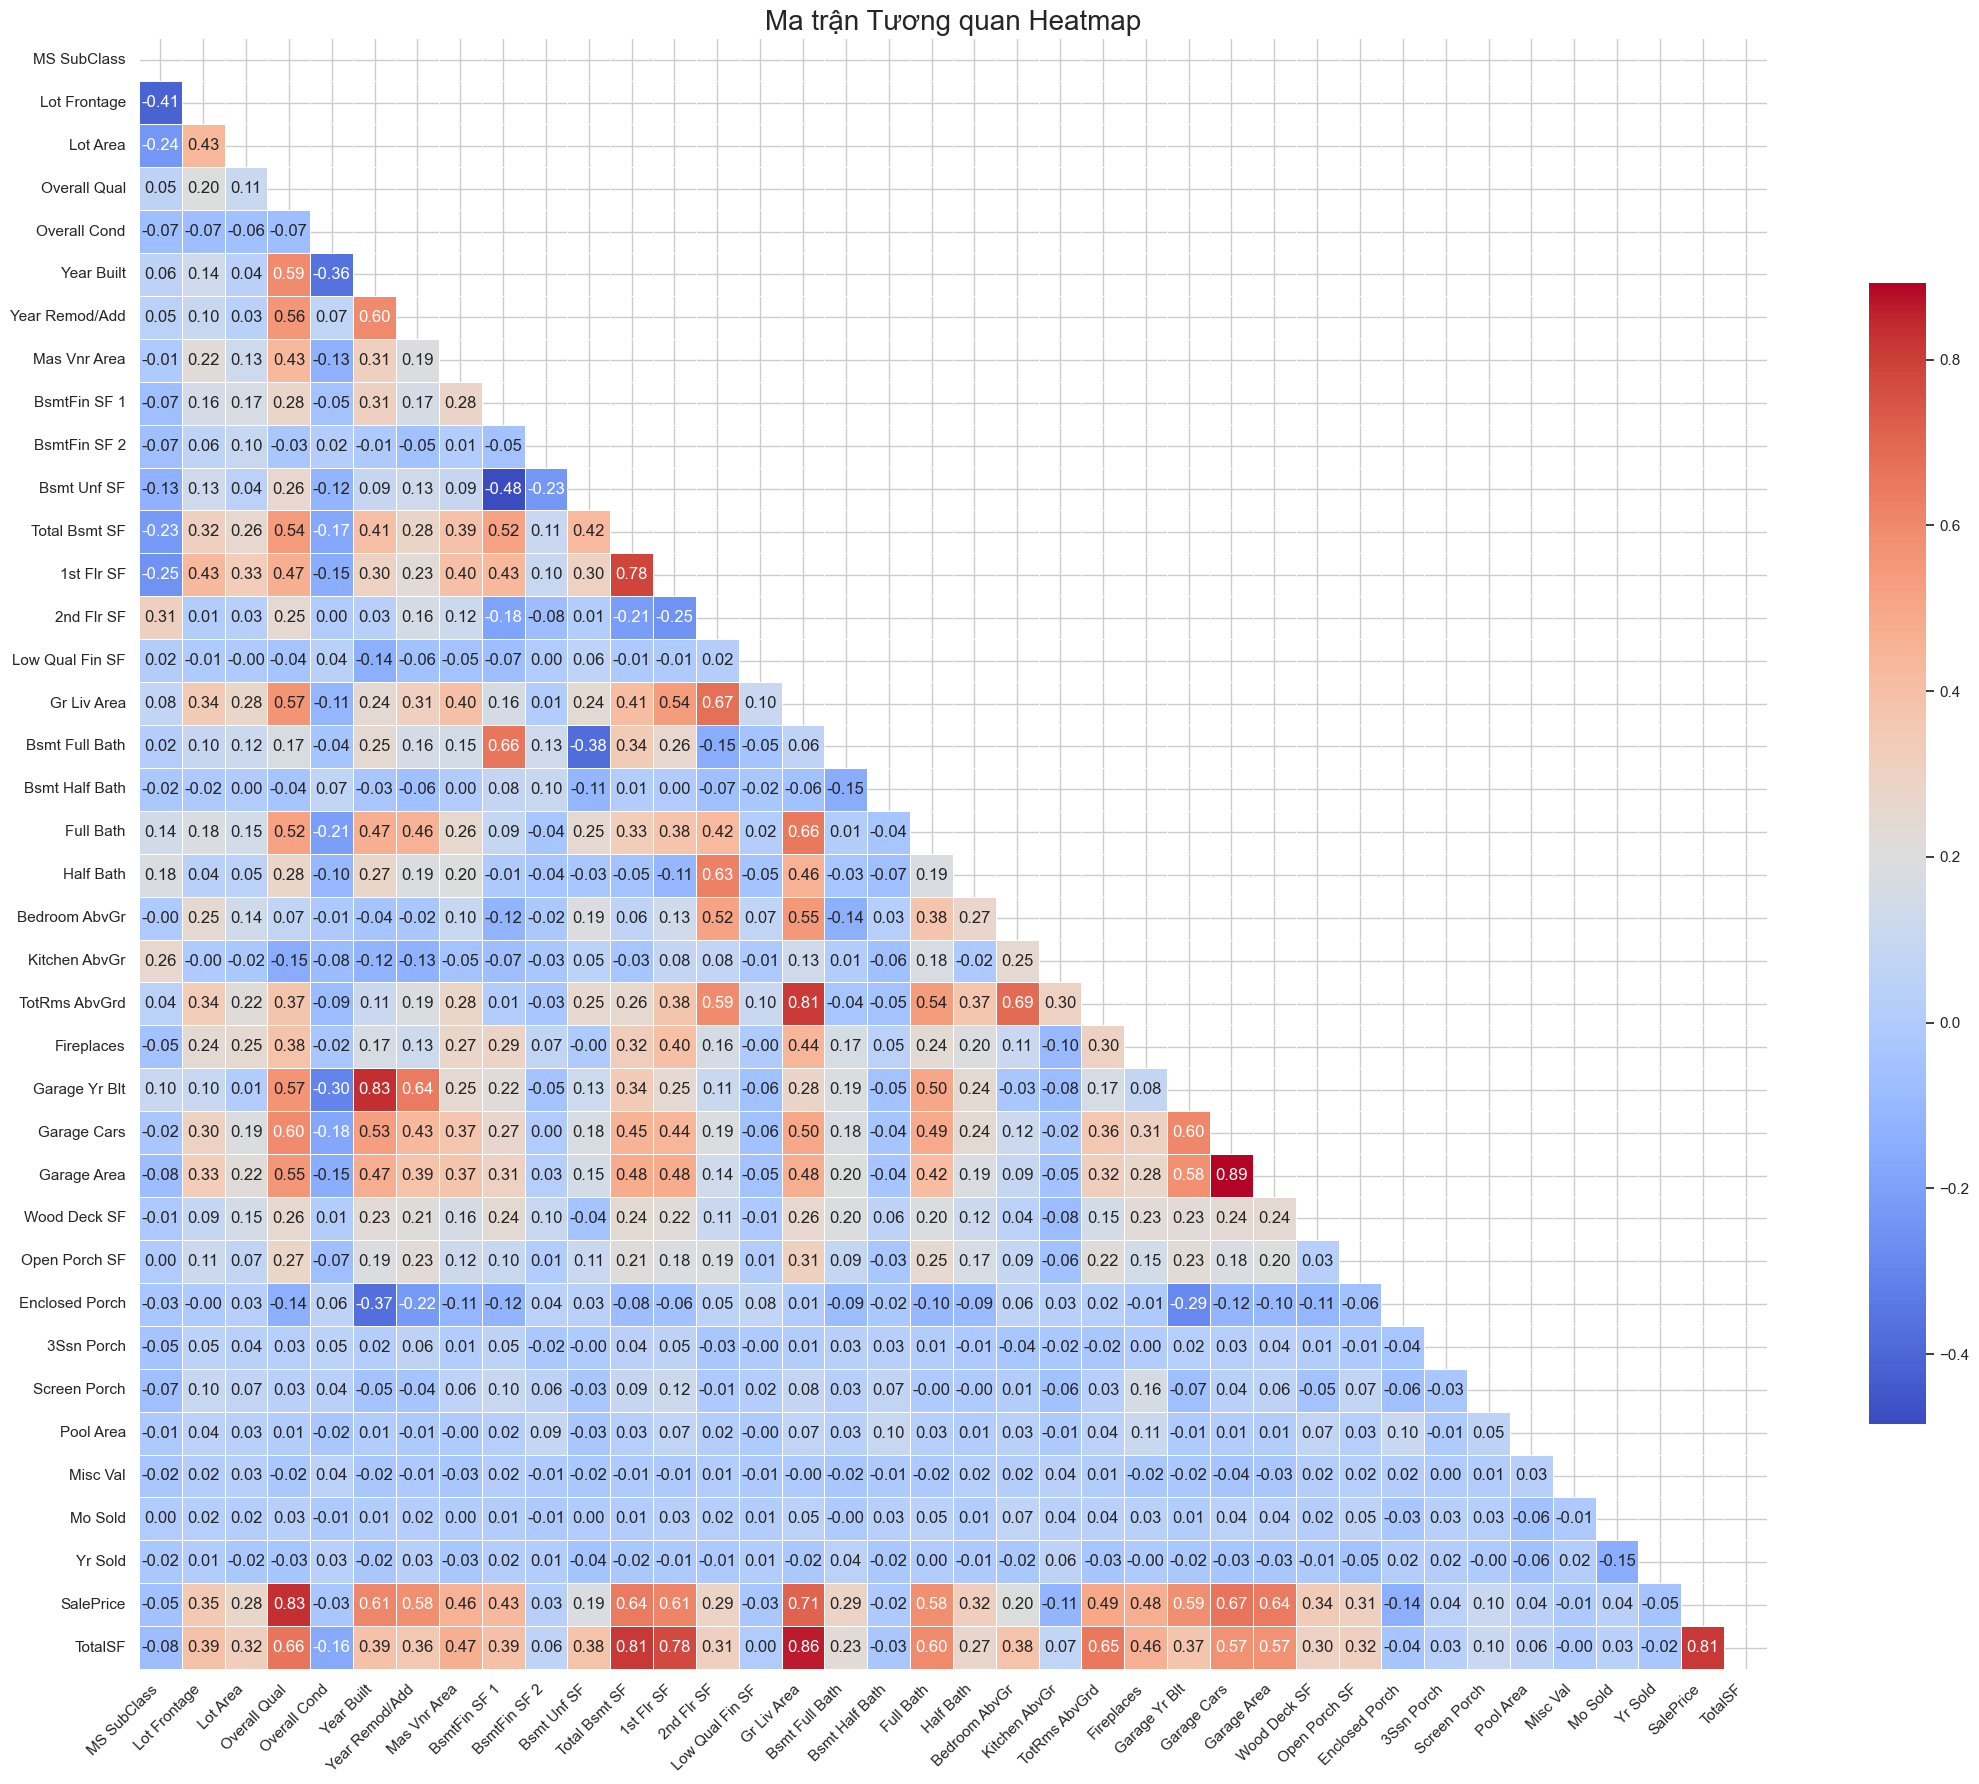

In [410]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(22, 18)) 
sns.heatmap(
    corr_matrix, 
    mask=mask,              
    cmap='coolwarm',
    annot=True,              
    fmt='.2f',              
    annot_kws={"size": 12},         
    linewidths=.5,
    cbar_kws={"shrink": .7}  
)
plt.title('Ma trận Tương quan Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

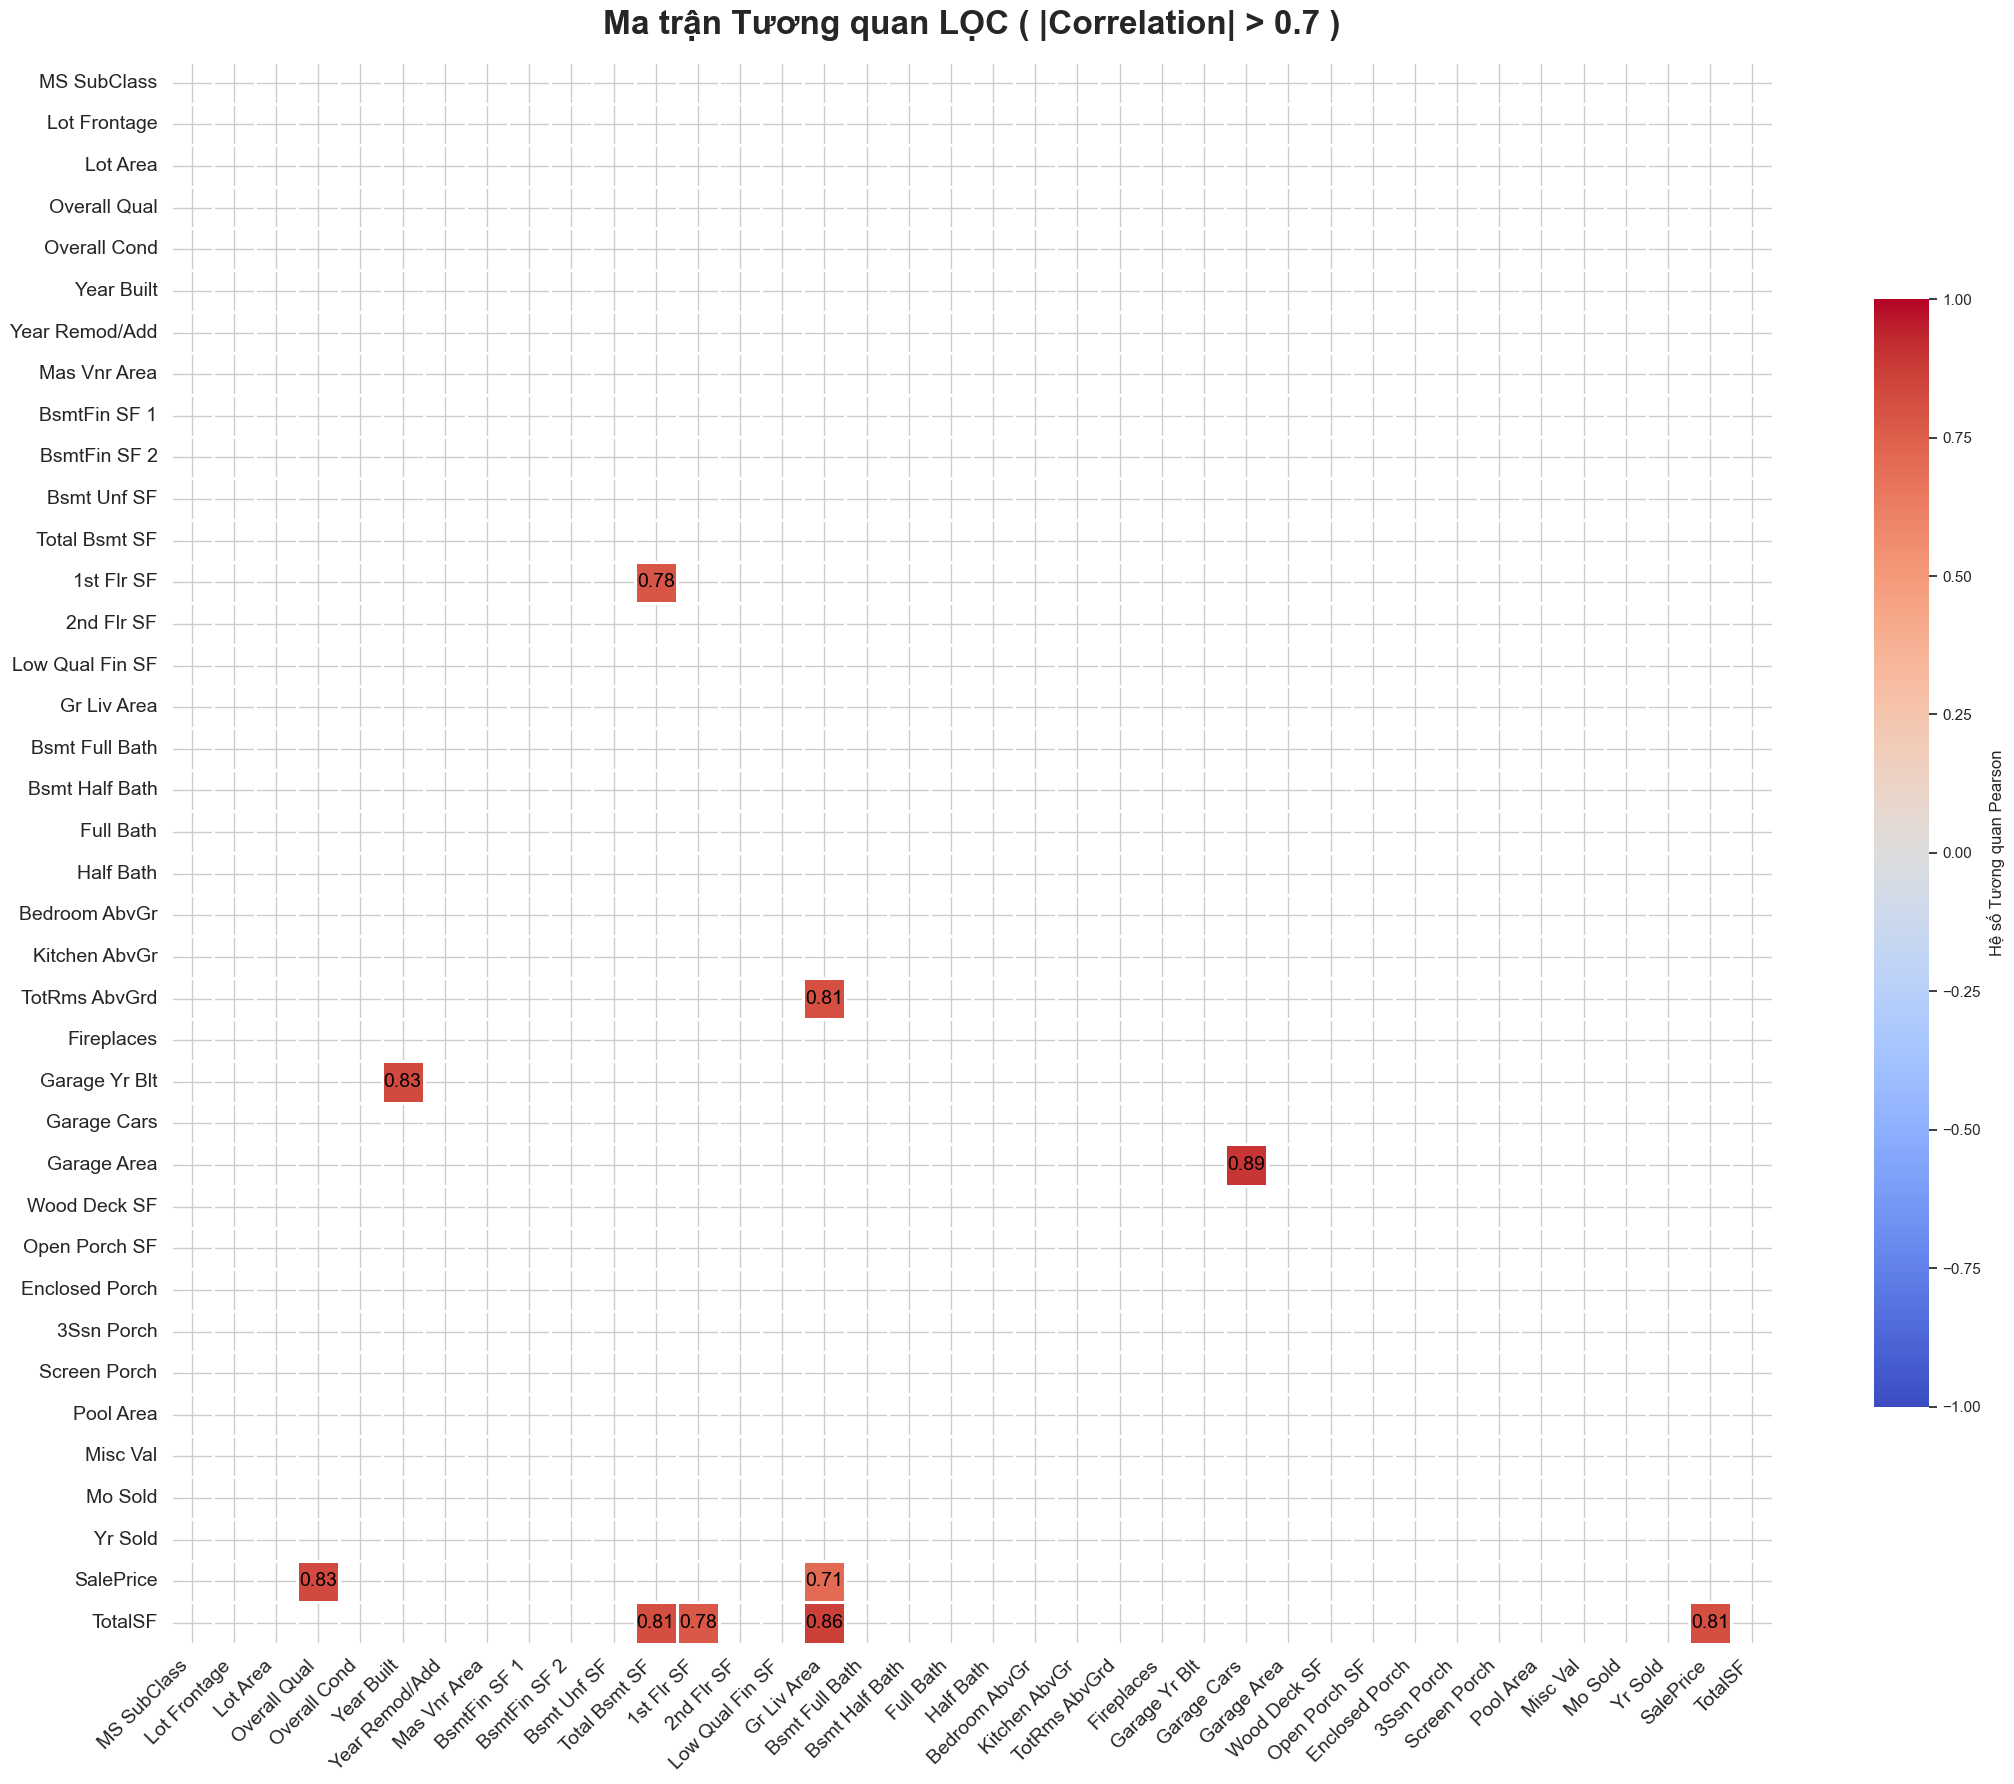

In [411]:
# Giả sử corr_matrix đã được tính toán từ đoạn code trước
# và các thư viện cần thiết (numpy, pandas, seaborn, matplotlib.pyplot) đã được import.

# 1. Tạo Mask ban đầu (Ẩn tam giác trên)
mask_triu = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 2. TẠO MASK PHỤ: Ẩn các giá trị có |correlation| <= 0.7
# Sao chép ma trận tương quan để xử lý
corr_filtered = corr_matrix.copy()

# Tạo mask cho điều kiện |corr| <= 0.7
# np.abs(corr_filtered) <= 0.7 sẽ là True cho các giá trị cần ẩn đi
mask_weak_corr = (np.abs(corr_filtered) <= 0.7)

# Kết hợp hai mask: Ẩn Tam giác trên HOẶC ẩn Tương quan yếu
# Vùng nào là True sẽ bị ẩn.
final_mask = mask_triu | mask_weak_corr


# 3. VẼ HEATMAP ĐÃ LỌC VÀ LÀM ĐẸP

plt.figure(figsize=(22, 18)) 

# Thiết lập dải màu (cmap) và giới hạn màu (vmin, vmax) 
# để đảm bảo các giá trị |> 0.7| được thể hiện rõ ràng.
sns.heatmap(
    corr_matrix, 
    mask=final_mask,          # Sử dụng mask đã lọc
    cmap='coolwarm',           # Chọn cmap sáng hơn, dễ nhìn hơn
    vmin=-1.0,                # Giới hạn dưới của dải màu
    vmax=1.0,                 # Giới hạn trên của dải màu
    annot=True,               # Hiển thị giá trị
    fmt='.2f',                # Định dạng 2 chữ số thập phân
    annot_kws={
        "size": 14, 
        "color": 'black'      # Màu chữ chú thích
    },         
    linewidths=0.8,           # Độ dày đường phân cách
    linecolor='white',        # Màu đường phân cách
    cbar_kws={
        "shrink": .7, 
        "label": 'Hệ số Tương quan Pearson'
    }  
)
plt.title(
    'Ma trận Tương quan LỌC ( |Correlation| > 0.7 )', 
    fontsize=24, 
    fontweight='bold', 
    pad=20
)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

# **B, Outliers Handling**

In [412]:
indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
df = df.drop(index=indices_to_drop, axis=0)
df = df[df['Gr Liv Area'] < 4000]

**Các tên biến cũng như index hàng chứa outlier của biến đó và lí do bị loại bỏ:**

* **`Gr Liv Area`:** 1498(trùng), 2180(trùng), 2181

* **`Garage Cars`:** 746

* **`Total Bsmt SF`:** 1498(trùng), 2180(trùng)

* **`Garage Area`:** 1258, 1498(trùng), 426

* **`1st Flr SF`:** 1498(trùng), 2180(trùng), 1497

* **`Garage Yr Blt`:** 2260


### Điểm cực đoan (Outliers) của 'Gr Liv Area' (Ngưỡng cắt: 4000.00):
      Order  Gr Liv Area  SalePrice
1498   1499         5642     160000
2180   2181         5095     183850
2181   2182         4676     184750
--------------------------------------------------------------------------------
### Điểm cực đoan (Outliers) của 'Garage Cars' (Ngưỡng cắt: 4.00):
     Order  Garage Cars  SalePrice
746    747          5.0     126500
--------------------------------------------------------------------------------
### Điểm cực đoan (Outliers) của 'Total Bsmt SF' (Ngưỡng cắt: 3000.00):
      Order  Total Bsmt SF  SalePrice
1498   1499         6110.0     160000
2180   2181         5095.0     183850
2181   2182         3138.0     184750
--------------------------------------------------------------------------------
### Điểm cực đoan (Outliers) của 'Garage Area' (Ngưỡng cắt: 1358.45):
      Order  Garage Area  SalePrice
1258   1259       1488.0     139000
1498   1499       1418.0     160000
426 

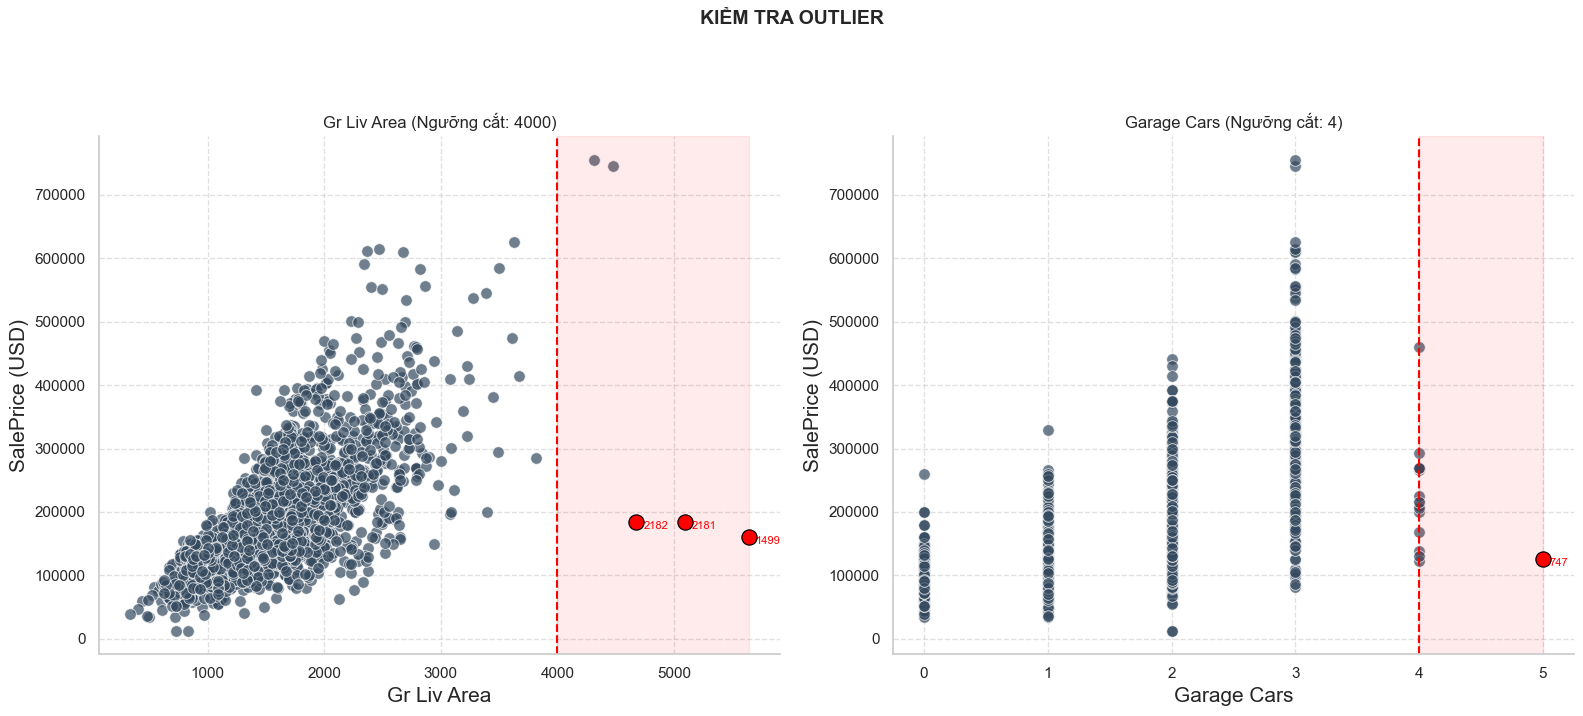

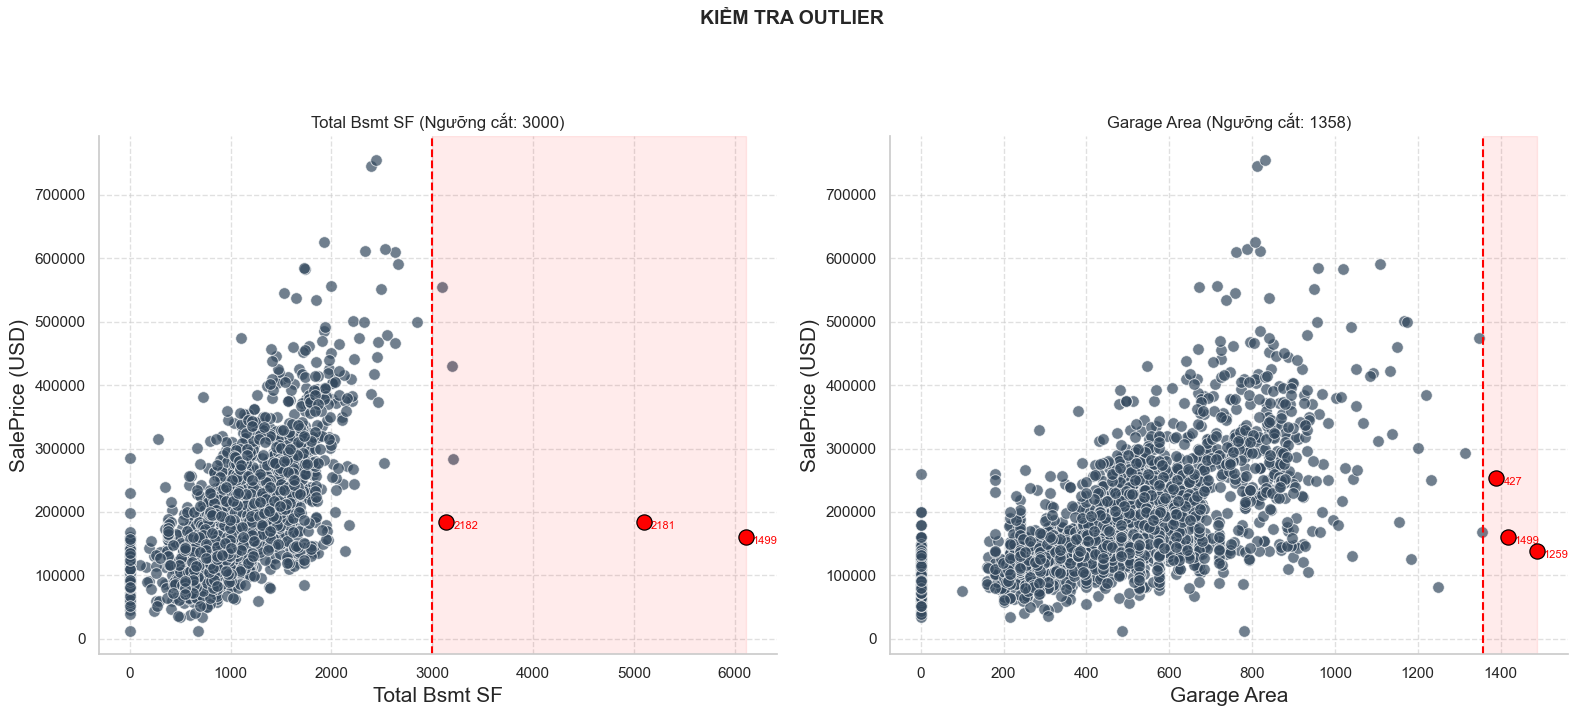

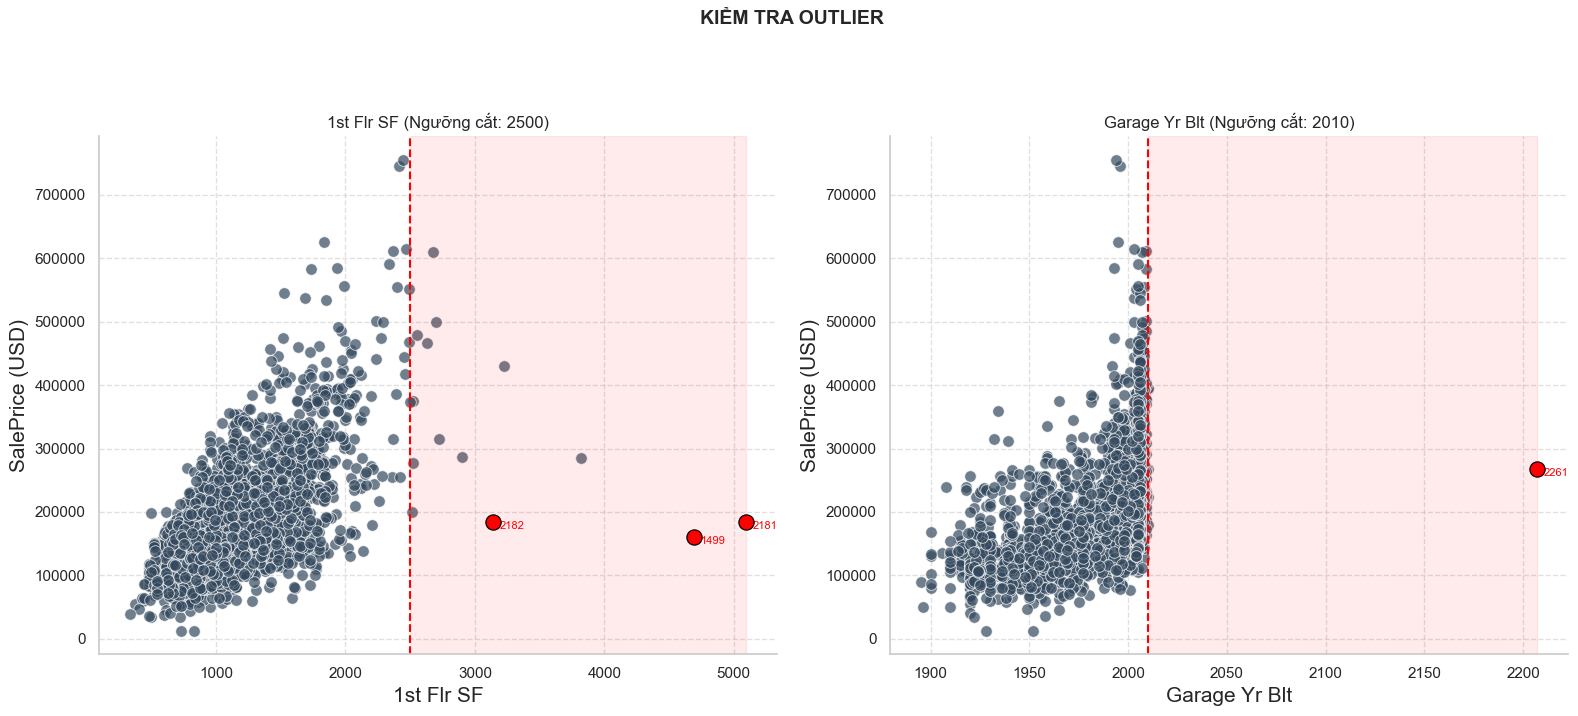

In [413]:
features_to_check = [
    'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Garage Yr Blt'
]

# 📌 TỰ ĐẶT NGƯỠNG CẮT CHO TỪNG FEATURE
CUSTOM_THRESHOLDS = {
    'Gr Liv Area': 4000,     
    'Total Bsmt SF': 3000,   
    'Garage Cars': 4,        
    '1st Flr SF': 2500      
}


# 1. Tính trước xem feature nào có outlier
outlier_info = {}

for feature in features_to_check:
    
    # Lấy ngưỡng: Ưu tiên giá trị tự đặt, nếu không có thì dùng quantile 0.999
    if feature in CUSTOM_THRESHOLDS:
        extreme_value = CUSTOM_THRESHOLDS[feature]
    else:
        extreme_value = B[feature].quantile(0.999) 
        
    # Lọc các điểm cực đoan
    outliers_to_note = (
        B[B[feature] > extreme_value]
        .sort_values(by='SalePrice')
    )

    if not outliers_to_note.empty:
        if len(outliers_to_note) > 3:
            outliers_to_note = outliers_to_note.iloc[:3]
             
        outlier_info[feature] = {
            "thresh": extreme_value,
            "df": outliers_to_note
        }

        print(f"### Điểm cực đoan (Outliers) của '{feature}' (Ngưỡng cắt: {extreme_value:.2f}):")
        display_cols = ['Order', feature, 'SalePrice']
        print(outliers_to_note[display_cols].to_string())
        print("-" * 80)

if not outlier_info:
    print("❌ Không có feature nào có outlier với các ngưỡng đã đặt.")
else:
    # 2. Vẽ chỉ những feature có outlier (Vẽ hai lớp scatterplot)
    feature_list = list(outlier_info.keys())
    n_features = len(feature_list)
    
    FEATURES_PER_ROW = 2
    feature_chunks = [
        feature_list[i:i + FEATURES_PER_ROW] 
        for i in range(0, n_features, FEATURES_PER_ROW)
    ]
    
    for chunk_idx, current_features in enumerate(feature_chunks):
        n_cols = len(current_features)
        n_rows = 1 

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 7)) 
        axes = np.atleast_1d(axes).ravel() 
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        fig.suptitle(f'KIỂM TRA OUTLIER',
                    y=1.02, fontsize=14, fontweight='bold')
        
        for idx, feature in enumerate(current_features):
            info = outlier_info[feature]
            ax = axes[idx]
            
            # 2a. scatter toàn bộ điểm (Màu xám mặc định)
            sns.scatterplot(
                x=feature,
                y='SalePrice',
                data=B,
                ax=ax,
                s=70,
                alpha=0.7,
                color='#34495e' # Đặt màu xám đậm cho các điểm bình thường
            )
            
            # 2b. VẼ LỚP THỨ HAI: Lọc và vẽ các điểm outlier lên trên (Màu đỏ)
            outliers_to_note = info["df"]
            sns.scatterplot(
                x=feature,
                y='SalePrice',
                data=outliers_to_note,
                ax=ax,
                s=120, # Kích thước lớn hơn để nổi bật
                alpha=1,
                color='red', # Màu đỏ cho outlier
                edgecolor='black', # Thêm viền đen
                zorder=10 # Đảm bảo lớp outlier nằm trên cùng
            )

            # đường đỏ ngưỡng outlier
            thresh = info["thresh"]
            ax.axvline(thresh, color='red', linestyle='--', linewidth=1.5)
            # tô vùng bên phải ngưỡng (vùng bị cắt)
            ax.axvspan(thresh, B[feature].max(),
                    color='red', alpha=0.08)

            # annotate ID của outlier (Giữ nguyên)
            for k in range(len(outliers_to_note)):
                ax.annotate(
                f"{outliers_to_note['Order'].iloc[k]}",
                (outliers_to_note[feature].iloc[k], outliers_to_note['SalePrice'].iloc[k]),
                textcoords="offset points", 
                xytext=(5, -5),              
                ha='left',                   
                fontsize=8,                  
                color='red'                  
            )
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_title(f"{feature} (Ngưỡng cắt: {thresh:.0f})", fontsize=12)
            ax.set_xlabel(feature, fontsize=15)
            ax.set_ylabel('SalePrice (USD)', fontsize=15)
            ax.grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# **C, Feature Engineering**

In [414]:
df['TotalSF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

In [415]:
y_log = np.log1p(df['SalePrice'])

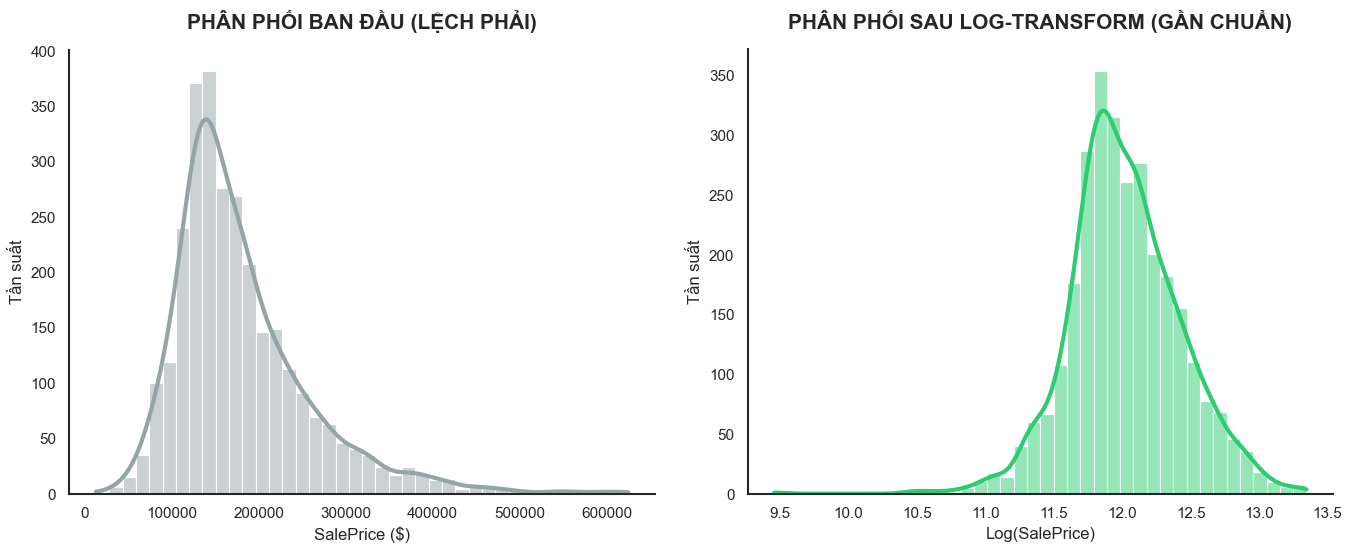

In [416]:
sns.set_theme(style="white")

# Kích thước Figure: (14, 6) giữ nguyên
plt.figure(figsize=(14, 6)) 

# =======================================================
## 1️⃣ Trước khi log-transform: Làm nổi bật KDE
# =======================================================
plt.subplot(1, 2, 1)
ax1 = plt.gca()

# 📌 Bỏ gridline và viền trên/phải
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5) # Làm đậm trục X
ax1.spines['left'].set_linewidth(1.5)   # Làm đậm trục Y

# Vẽ Histogram, ẩn cột (alpha=0), làm đậm và đổi màu đường KDE
sns.histplot(
    y_raw, 
    kde=True, 
    bins=40, 
    color='#95a5a6', 
    line_kws={'linewidth': 3, 'color': '#95a5a6'} # Làm đậm đường KDE, dùng màu cam đậm
)

plt.title('PHÂN PHỐI BAN ĐẦU (LỆCH PHẢI)', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('SalePrice ($)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)


# =======================================================
## 2️⃣ Sau khi log-transform: Làm nổi bật KDE
# =======================================================
plt.subplot(1, 2, 2)
ax2 = plt.gca() 

# 📌 Bỏ gridline và viền trên/phải
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(1.5) # Làm đậm trục X
ax2.spines['left'].set_linewidth(1.5)   # Làm đậm trục Y

# Vẽ Histogram, ẩn cột (alpha=0), làm đậm và đổi màu đường KDE
sns.histplot(
    y_log, 
    kde=True, 
    bins=40, 
    color='#2ecc71', 
    line_kws={'linewidth': 3, 'color': '#2ecc71'} # Làm đậm đường KDE, dùng màu xanh dương đậm
)

plt.title('PHÂN PHỐI SAU LOG-TRANSFORM (GẦN CHUẨN)', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Log(SalePrice)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)


plt.tight_layout(pad=2)
plt.show()

Text(0, 0.5, 'Tần suất')

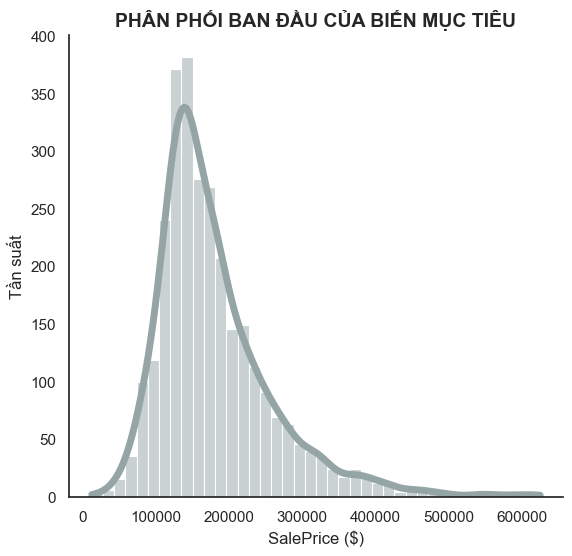

In [417]:
sns.set_theme(style="white") # Sử dụng style "white" để mặc định không có lưới

# Thiết lập kích thước figure
plt.figure(figsize=(14,6))

# 1️⃣ Trước khi log-transform
plt.subplot(1, 2, 1)
ax = plt.gca() # Lấy đối tượng Axes hiện tại

# Bỏ viền trên và phải
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Bỏ các đường lưới (Mặc định style="white" đã bỏ, nhưng thêm để đảm bảo)
ax.grid(False) 

# Vẽ biểu đồ
sns.histplot(
    y_raw, 
    kde=True, 
    bins=40, 
    color='#95a5a6', 
    line_kws={'linewidth': 5, 'color': '#c0392b'} # Làm đậm và đổi màu đường KDE sang ĐỎ
)
plt.title('PHÂN PHỐI BAN ĐẦU CỦA BIẾN MỤC TIÊU', fontsize=14, fontweight='bold')
plt.xlabel('SalePrice ($)')
plt.ylabel('Tần suất')

# **D, Model Training**

In [418]:
y_raw = df['SalePrice']

y_log = np.log1p(df['SalePrice'])

X_train, X_test, y_train_log, y_test_log = train_test_split(df, y_log, test_size=0.3, random_state=42)

numeric_cols_of_X_train = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_of_X_train = X_train.select_dtypes(include=['object']).columns.tolist()

In [419]:

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Điền missing bằng trung vị
    ('scaler', StandardScaler())                   # Chuẩn hóa
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Điền missing
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # Mã hóa One-hot
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_of_X_train),
        ('cat', categorical_transformer, categorical_cols_of_X_train)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectPercentile(f_regression, percentile=50)), # Giữ lại 50% đặc trưng tốt nhất
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train_log)
y_pred_log = model_pipeline.predict(X_test)
y_pred_raw = np.expm1(y_pred_log) 
y_test_raw = y_raw.loc[y_test_log.index]

# **E, Model Evaluation**

In [420]:
rmse_dollar = np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))
mae_dollar = mean_absolute_error(y_test_raw, y_pred_raw)
r2 = r2_score(y_test_raw, y_pred_raw)

print(f"Linear Regression - Real RMSE: ${rmse_dollar:,.2f}")
print(f"Linear Regression - Real MAE: ${mae_dollar:,.2f}")
print(f"Linear Regression - R2 Score: {r2:.4f}")

Linear Regression - Real RMSE: $22,775.76
Linear Regression - Real MAE: $9,640.36
Linear Regression - R2 Score: 0.9098


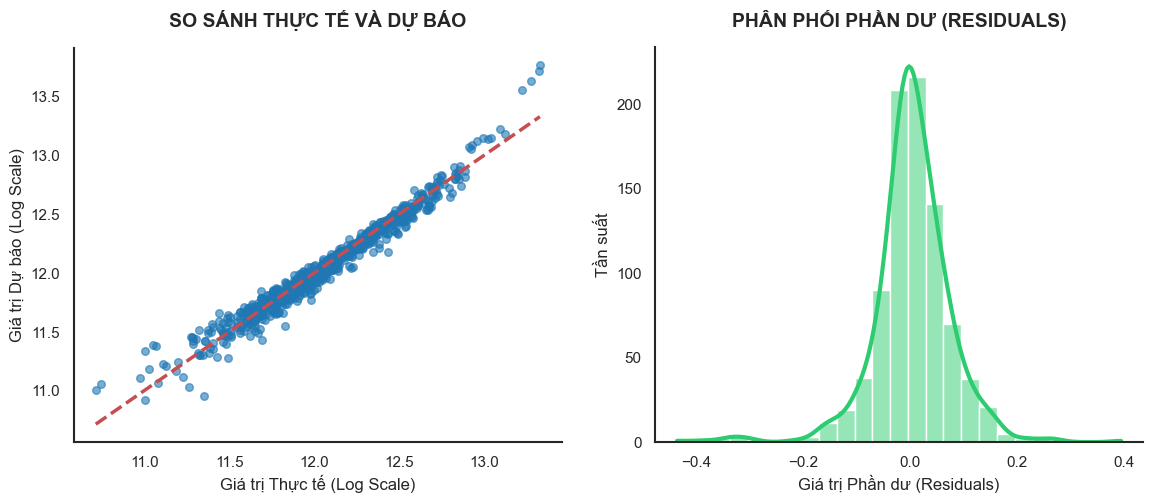

In [421]:
# --- KẾT THÚC KHỞI TẠO DỮ LIỆU ---

# 0. Thiết lập Style (Bỏ lưới)
sns.set_theme(style="white")

plt.figure(figsize=(12, 5.5)) # Tăng kích thước tổng thể

# =======================================================
# 1. BIỂU ĐỒ SCATTER: Thực tế vs Dự báo (Actual vs Predicted)
# =======================================================
plt.subplot(1, 2, 1)
ax1 = plt.gca()

# 📌 Bỏ gridline và viền trên/phải
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5) # Làm đậm trục X
ax1.spines['left'].set_linewidth(1.5)   # Làm đậm trục Y

# Vẽ Scatter Plot
plt.scatter(
    y_test_log, 
    y_pred_log, 
    alpha=0.6, 
    s=30, # Tăng kích thước điểm
    color='#1f77b4' # Màu xanh đậm
)

# Đường chéo 45 độ (Đường dự báo hoàn hảo)
plt.plot(
    [y_test_log.min(), y_test_log.max()], 
    [y_test_log.min(), y_test_log.max()], 
    'r--', # Màu đỏ, nét đứt
    lw=2.5 # Làm đậm đường
)

plt.xlabel('Giá trị Thực tế (Log Scale)', fontsize=12)
plt.ylabel('Giá trị Dự báo (Log Scale)', fontsize=12)
plt.title(
    'SO SÁNH THỰC TẾ VÀ DỰ BÁO', 
    fontsize=14, 
    fontweight='bold', 
    pad=15, 
    loc='center'
)


# =======================================================
# 2. BIỂU ĐỒ HISTOGRAM: Phân phối Phần dư (Residuals)
# =======================================================
plt.subplot(1, 2, 2)
ax2 = plt.gca()

# 📌 Bỏ gridline và viền trên/phải
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)

# Vẽ Histogram với KDE (Đã làm đẹp)
sns.histplot(
    residuals, 
    kde=True,
    bins=25, # Tăng bins để biểu đồ mượt hơn
    color='#2ecc71', # Màu xanh lá
    edgecolor='white', # Viền trắng giữa các cột
    line_kws={'linewidth': 3, 'color': '#27ae60'} # Làm đậm đường KDE
)

plt.xlabel('Giá trị Phần dư (Residuals)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.title(
    'PHÂN PHỐI PHẦN DƯ (RESIDUALS)', 
    fontsize=14, 
    fontweight='bold', 
    pad=15, 
    loc='center'
)

plt.tight_layout(pad=2) # Tăng khoảng cách giữa 2 biểu đồ
plt.show()

# **F, Baseline Model**

In [422]:
def raw_approach(df):
    # Chỉ lấy số, điền 0 vào chỗ trống
    df_raw = df.select_dtypes(include=[np.number]).copy()
    df_raw = df_raw.fillna(0) 
    
    X = df_raw.drop(['SalePrice', 'Order', 'PID'], axis=1, errors='ignore')
    y = df_raw['SalePrice']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

raw_r2, raw_mae, raw_rmse = raw_approach(df_raw)

def expert_approach(df):
    df_clean = df.copy()
    cols_to_drop = ['Order', 'PID', #ID columns
                'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vrn Type', #High missing values
                '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Misc Val', 'Bsmt Half Bath', 'Overall Cond', 'Low Qual Fin SF', 'Yr Sold', 'MS SubClass', #Low correlation
                'Garage Area', 'TotRms AbvGrd' # Multicollinear with 'Gr Liv Area'
                ] 
    # Tổng cộng xoá 18 biến
    df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns])
    
    # 1. Loại bỏ Outlier (Quan trọng!)
    indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
    df_clean = df_clean.drop(index=indices_to_drop, axis=0)
    df_clean = df_clean[df_clean['Gr Liv Area'] < 4000]
    
    df_clean['TotalSF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
    y_log = np.log1p(df_clean['SalePrice']) 
    y_raw = df_clean['SalePrice'] 
    y_log = np.log1p(df_clean['SalePrice']) 
    # 3. Tạo đặc trưng mới (Feature Engineering)
    df_clean['TotalSF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
    
    X_train, X_test, y_train_log, y_test_log = train_test_split(df_clean, y_log, test_size=0.3, random_state=42)

    numeric_cols_of_X_train = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols_of_X_train = X_train.select_dtypes(include=['object']).columns.tolist()
    
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')), # Điền missing bằng trung vị
        ('scaler', StandardScaler())                   # Chuẩn hóa
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Điền missing
        ('encoder', OneHotEncoder(handle_unknown='ignore')) # Mã hóa One-hot
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols_of_X_train),
            ('cat', categorical_transformer, categorical_cols_of_X_train)
        ])

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectPercentile(f_regression, percentile=50)), # Giữ lại 50% đặc trưng tốt nhất
        ('regressor', LinearRegression())
    ])

    model_pipeline.fit(X_train, y_train_log)
    y_pred_log = model_pipeline.predict(X_test)
    y_pred_raw = np.expm1(y_pred_log) 
    y_test_raw = y_raw.loc[y_test_log.index]
    
    return r2_score(y_test_raw, y_pred_raw), mean_absolute_error(y_test_raw, y_pred_raw), np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))

clean_r2, clean_mae, clean_rmse = expert_approach(df_clean)

print(f"Kết quả Raw(R²): {raw_r2:.2f}")
print(f"Kết quả Raw (MAE): {raw_mae:.2f}")
print(f"Kết quả Raw (RMSE): {raw_rmse:.2f}")
print(f"Kết quả Clean(R²): {clean_r2:.2f}")
print(f"Kết quả Clean (MAE): {clean_mae:.2f}")
print(f"Kết quả Clean (RMSE): {clean_rmse:.2f}")


Kết quả Raw(R²): 0.85
Kết quả Raw (MAE): 20834.50
Kết quả Raw (RMSE): 32940.98
Kết quả Clean(R²): 0.91
Kết quả Clean (MAE): 9640.36
Kết quả Clean (RMSE): 22775.76


/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/2763363114.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Trạng thái', y='R²', data=df, palette=colors)


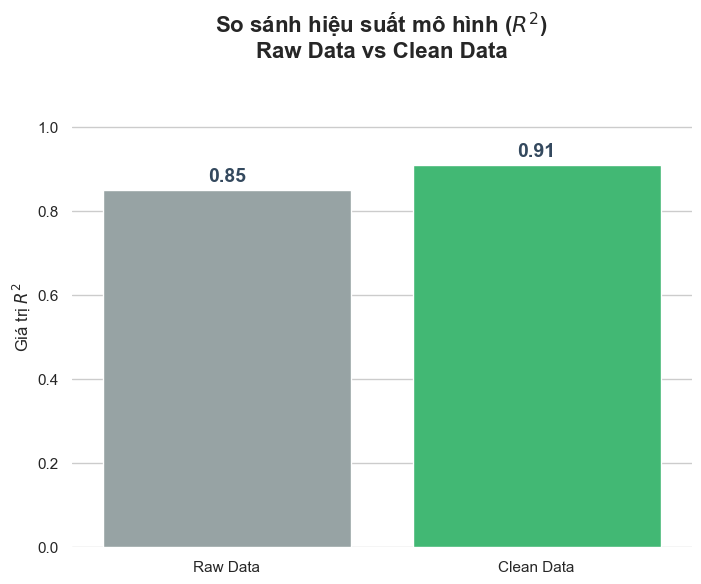

In [423]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu
data = {
    'Trạng thái': ['Raw Data', 'Clean Data'],
    'R²': [0.85, 0.91]
}
df = pd.DataFrame(data)

# 2. Thiết lập giao diện (Style)
# Sử dụng style 'whitegrid' để có các đường lưới ngang mờ, giúp dễ nhìn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6)) # Kích thước biểu đồ (ngang, dọc)

# 3. Định nghĩa màu sắc
# Màu xám (#95a5a6) cho Raw để làm nền
# Màu xanh lá (#2ecc71) cho Clean để làm nổi bật sự cải thiện
colors = ['#95a5a6', '#2ecc71'] 

# 4. Vẽ biểu đồ cột
ax = sns.barplot(x='Trạng thái', y='R²', data=df, palette=colors)

# 5. Tinh chỉnh các thành phần của biểu đồ
# Thêm tiêu đề chính
plt.title('So sánh hiệu suất mô hình ($R^2$)\nRaw Data vs Clean Data', 
        fontsize=16, fontweight='bold', pad=20)

# Nhãn trục
plt.ylabel('Giá trị $R^2$', fontsize=12)
plt.xlabel('') # Bỏ nhãn trục X vì tên cột đã rõ ràng

# Đặt giới hạn trục Y từ 0 đến 1.1 để cột không bị chạm nóc, tạo khoảng trống cho số liệu
plt.ylim(0, 1.1)

# 6. Thêm nhãn giá trị (Annotation) lên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Giá trị hiển thị (format 2 số thập phân)
                (p.get_x() + p.get_width() / 2., p.get_height()), # Vị trí (giữa cột, trên đỉnh cột)
                ha='center', va='center', 
                xytext=(0, 10), # Dịch chuyển chữ lên trên 10 điểm ảnh
                textcoords='offset points',
                fontsize=14, fontweight='bold', color='#34495e') # Màu chữ đậm

# 7. Loại bỏ bớt khung viền (trên và phải) cho biểu đồ thoáng hơn
sns.despine(left=True, bottom=True)

# 8. Hiển thị biểu đồ
plt.show()
# Nếu muốn lưu file, bạn dùng dòng này:
# plt.savefig('so_sanh_r2.png', bbox_inches='tight', dpi=300)

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/3247070636.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Trạng thái', y='MAE', data=df, palette=colors)


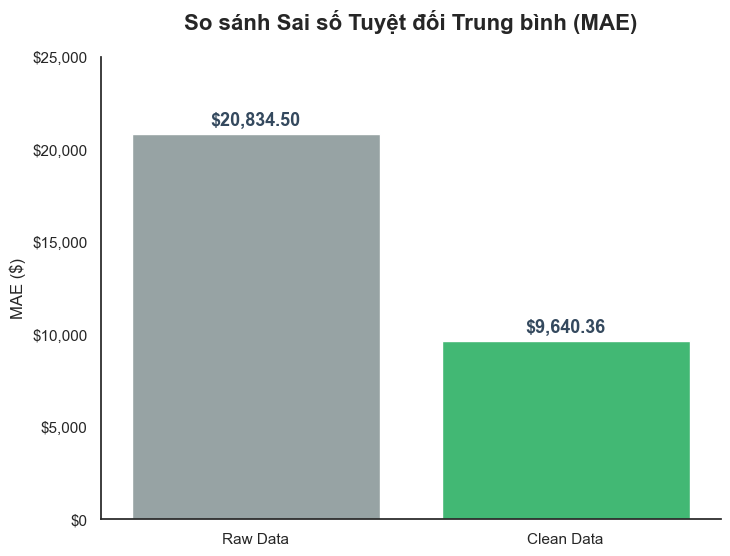

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker # Thêm thư viện này để format số trên trục

# 1. Chuẩn bị dữ liệu
data = {
    'Trạng thái': ['Raw Data', 'Clean Data'],
    'MAE': [20834.50, 9640.36]
}
df = pd.DataFrame(data)

# 2. Thiết lập giao diện (Style) - Vẫn giữ nền trắng sạch
sns.set_theme(style="white") 
plt.figure(figsize=(8, 6))

# 3. Màu sắc
colors = ['#95a5a6', '#2ecc71'] 

# 4. Vẽ biểu đồ
ax = sns.barplot(x='Trạng thái', y='MAE', data=df, palette=colors)

# 5. Tinh chỉnh tiêu đề và nhãn
plt.title('So sánh Sai số Tuyệt đối Trung bình (MAE)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('MAE ($)', fontsize=12) # Đặt lại tên cho trục Y
plt.xlabel('')

# Đặt giới hạn trục Y
plt.ylim(0, 25000)

# 6. Xử lý Trục Y (Thanh bên trái) - ĐÂY LÀ PHẦN BẠN CẦN
# Format số trên trục Y thành tiền tệ (ví dụ: $10,000) thay vì số thường
formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# 7. Thêm nhãn giá trị cụ thể lên cột (vẫn giữ để dễ đọc)
for p in ax.patches:
    label = f'${p.get_height():,.2f}'
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=13, fontweight='bold', color='#34495e')

# 8. Despine: Chỉ bỏ đường viền trên và phải, GIỮ LẠI TRÁI (left=False)
sns.despine(top=True, right=True, left=False)

plt.show()

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/2024163077.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Trạng thái', y='RMSE', data=df, palette=colors)


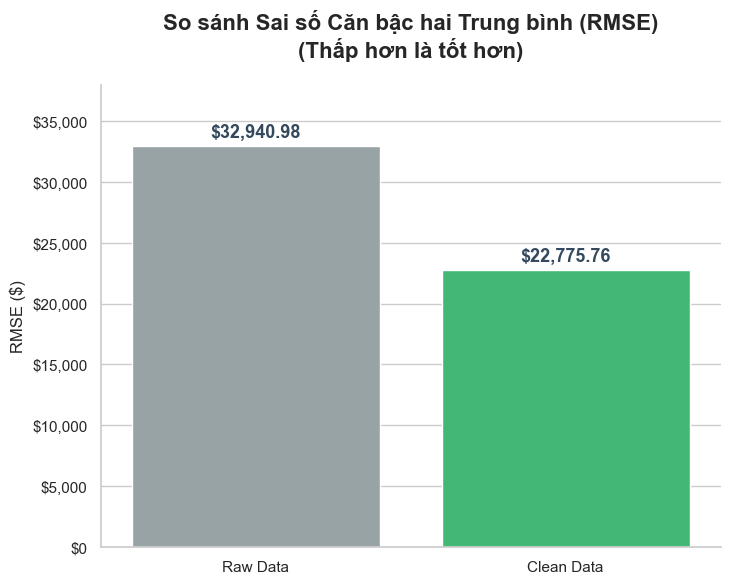

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# 1. Cập nhật dữ liệu RMSE
data = {
    'Trạng thái': ['Raw Data', 'Clean Data'],
    'RMSE': [32940.98, 22775.76]
}
df = pd.DataFrame(data)

# 2. Thiết lập giao diện
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# 3. Màu sắc (Xám vs Xanh lá)
colors = ['#95a5a6', '#2ecc71']

# 4. Vẽ biểu đồ
ax = sns.barplot(x='Trạng thái', y='RMSE', data=df, palette=colors)

# 5. Tiêu đề và nhãn
plt.title('So sánh Sai số Căn bậc hai Trung bình (RMSE)\n(Thấp hơn là tốt hơn)', 
        fontsize=16, fontweight='bold', pad=20)
plt.ylabel('RMSE ($)', fontsize=12)
plt.xlabel('')

# Thiết lập giới hạn trục Y (tăng lên khoảng 38000 để thoáng)
plt.ylim(0, 38000)

# 6. Xử lý Trục Y (Thanh bên trái)
# Format số trục Y: Thêm dấu $ và dấu phẩy (ví dụ: $30,000)
formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)



# 7. Thêm nhãn giá trị chi tiết trên đầu cột
for p in ax.patches:
    label = f'${p.get_height():,.2f}'
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=13, fontweight='bold', color='#34495e')

# 8. Despine: Giữ lại trục trái (left=False)
sns.despine(top=True, right=True, left=False)

plt.show()

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/238426188.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Trạng thái', y='R²', data=df, palette=colors)


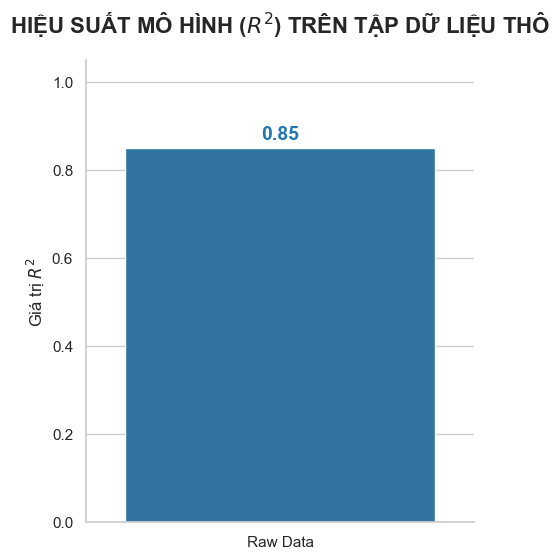

In [426]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu
data = {
    'Trạng thái': ['Raw Data'],
    'R²': [0.85]
}
df = pd.DataFrame(data)

# 2. Thiết lập giao diện (Style)
# Dùng 'whitegrid' để có lưới ngang, giúp việc đọc giá trị từ trục Y dễ hơn
sns.set_theme(style="whitegrid") 
plt.figure(figsize=(5, 6)) # Giữ nguyên kích thước cân đối

# 3. Định nghĩa màu sắc
colors = ['#1f77b4'] # Màu xanh đậm

# 4. Vẽ biểu đồ cột
ax = sns.barplot(x='Trạng thái', y='R²', data=df, palette=colors)

# 5. Tinh chỉnh các thành phần của biểu đồ
# Tiêu đề chính
plt.title('HIỆU SUẤT MÔ HÌNH ($R^2$) TRÊN TẬP DỮ LIỆU THÔ', 
        fontsize=16, fontweight='bold', pad=20, loc='center') 

# Nhãn trục
plt.ylabel('Giá trị $R^2$', fontsize=12)
plt.xlabel('') 

# Đặt giới hạn trục Y
plt.ylim(0, 1.05) 

# 6. Thêm nhãn giá trị (Annotation) lên đầu cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Giá trị hiển thị
                (p.get_x() + p.get_width() / 2., p.get_height()), # Vị trí
                ha='center', va='center', 
                xytext=(0, 10), # Dịch chuyển chữ lên trên 10 điểm ảnh
                textcoords='offset points',
                fontsize=14, fontweight='bold', color='#1f77b4') # Chữ cùng màu cột

# 7. Hiển thị lại trục Y và các đường lưới
# Cần đảm bảo các đường trục Y được hiển thị
# Bỏ khung viền trên và phải
sns.despine(top=True, right=True)
# Trục Y đã được hiển thị tự động vì đã dùng style="whitegrid" 
# và không gọi ax.get_yaxis().set_visible(False)

# 8. Hiển thị biểu đồ
plt.show()
# plt.savefig('r2_raw_data_with_yaxis.png', bbox_inches='tight', dpi=300)

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/752636169.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Overall Qual', y='SalePrice', data=df_insight, palette="Blues")


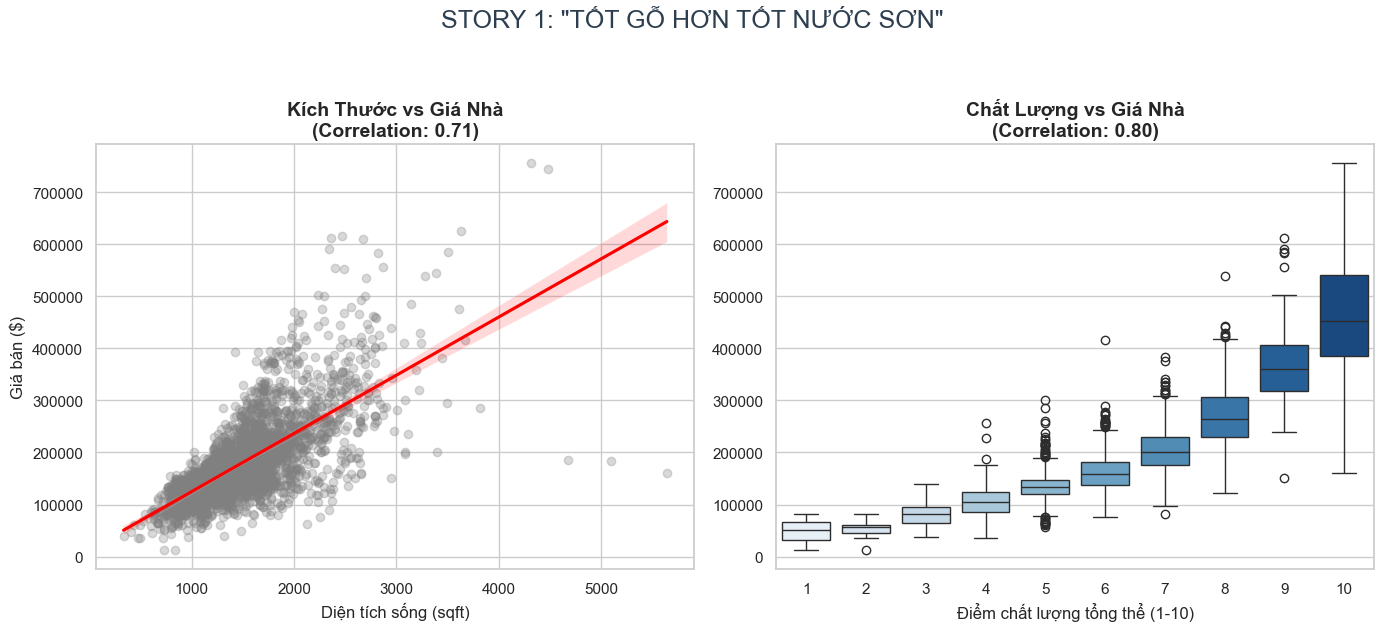

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/752636169.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fireplaces', y='SalePrice', data=df_insight, estimator=np.median, errorbar=None, palette="Oranges", ax=axes[0])
/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/752636169.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Garage Cars', y='SalePrice', data=df_insight, estimator=np.median, errorbar=None, palette="Purples", ax=axes[1])


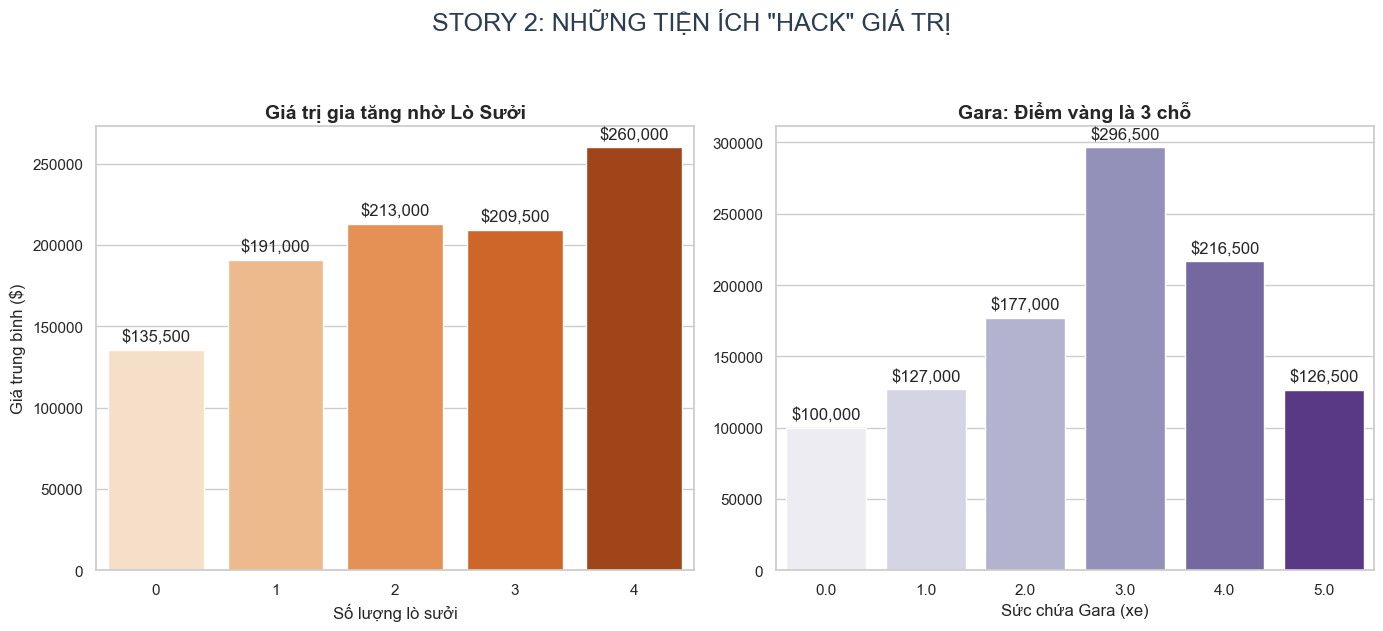

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_11160/752636169.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=combined_nbhd.index, y=combined_nbhd.values, palette=colors)


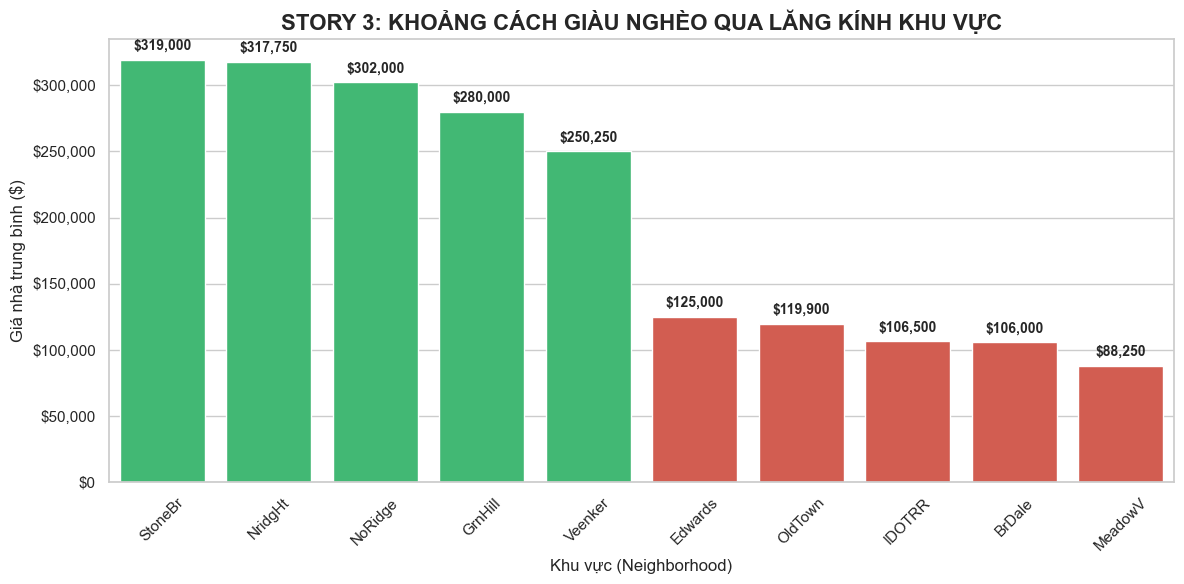

In [427]:
# Thiết lập giao diện chung (Style)
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif' # Dùng font không chân cho hiện đại

# ==============================================================================
# STORY 1: CHẤT LƯỢNG (QUALITY) VS KÍCH THƯỚC (SIZE)
# ==============================================================================
plt.figure(figsize=(14, 6))

# Biểu đồ 1: Diện tích vs Giá
plt.subplot(1, 2, 1)
sns.regplot(x='Gr Liv Area', y='SalePrice', data=df_insight, 
            scatter_kws={'alpha':0.3, 'color':'gray'}, line_kws={'color':'red'})
plt.title(f'Kích Thước vs Giá Nhà\n(Correlation: {df_insight["Gr Liv Area"].corr(df_insight["SalePrice"]):.2f})', fontsize=14, fontweight='bold')
plt.xlabel('Diện tích sống (sqft)')
plt.ylabel('Giá bán ($)')

# Biểu đồ 2: Chất lượng vs Giá
plt.subplot(1, 2, 2)
# Vì Overall Qual là biến rời rạc, ta dùng Boxplot để thấy rõ phân phối
sns.boxplot(x='Overall Qual', y='SalePrice', data=df_insight, palette="Blues")
plt.title(f'Chất Lượng vs Giá Nhà\n(Correlation: {df_insight["Overall Qual"].corr(df_insight["SalePrice"]):.2f})', fontsize=14, fontweight='bold')
plt.xlabel('Điểm chất lượng tổng thể (1-10)')
plt.ylabel('') # Bỏ nhãn Y cho đỡ rối

plt.suptitle('STORY 1: "TỐT GỖ HƠN TỐT NƯỚC SƠN"', fontsize=18, color='#2c3e50', y=1.05)
plt.tight_layout()
plt.show()


# ==============================================================================
# STORY 2: SỨC MẠNH CỦA TIỆN ÍCH (LÒ SƯỞI & GARA)
# ==============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Lò sưởi
sns.barplot(x='Fireplaces', y='SalePrice', data=df_insight, estimator=np.median, errorbar=None, palette="Oranges", ax=axes[0])
axes[0].set_title('Giá trị gia tăng nhờ Lò Sưởi', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Giá trung bình ($)')
axes[0].set_xlabel('Số lượng lò sưởi')
# Thêm nhãn giá tiền
for p in axes[0].patches:
    axes[0].annotate(f'${int(p.get_height()):,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Gara
sns.barplot(x='Garage Cars', y='SalePrice', data=df_insight, estimator=np.median, errorbar=None, palette="Purples", ax=axes[1])
axes[1].set_title('Gara: Điểm vàng là 3 chỗ', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
axes[1].set_xlabel('Sức chứa Gara (xe)')
# Thêm nhãn giá tiền
for p in axes[1].patches:
    if p.get_height() > 0: # Tránh lỗi cột rỗng
        axes[1].annotate(f'${int(p.get_height()):,}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.suptitle('STORY 2: NHỮNG TIỆN ÍCH "HACK" GIÁ TRỊ', fontsize=18, color='#2c3e50', y=1.05)
plt.tight_layout()
plt.show()


# ==============================================================================
# STORY 3: BẤT BÌNH ĐẲNG KHU VỰC (TOP 5 VS BOTTOM 5)
# ==============================================================================
# Tính toán dữ liệu
nbhd_stats = df_insight.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)
top_5 = nbhd_stats.head(5)
bottom_5 = nbhd_stats.tail(5)
combined_nbhd = pd.concat([top_5, bottom_5])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
colors = ['#2ecc71']*5 + ['#e74c3c']*5 # 5 màu xanh cho top, 5 màu đỏ cho bottom
ax = sns.barplot(x=combined_nbhd.index, y=combined_nbhd.values, palette=colors)

plt.title('STORY 3: KHOẢNG CÁCH GIÀU NGHÈO QUA LĂNG KÍNH KHU VỰC', fontsize=16, fontweight='bold')
plt.ylabel('Giá nhà trung bình ($)')
plt.xlabel('Khu vực (Neighborhood)')
plt.xticks(rotation=45)

# Thêm nhãn giá tiền
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

for p in ax.patches:
    ax.annotate(f'${int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()